<a href="https://colab.research.google.com/github/SimoneRosset/AUGMENTATION_GAN/blob/master/AUGMENTATION_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AUGMENTATION_GAN
based on this [paper](https://arxiv.org/pdf/1803.01229.pdf)

In [51]:
import torch
import torchvision
import torchvision.transforms as transforms

In [52]:
import os

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [147]:
img_dim=128
transform = transforms.Compose(
    [transforms.Resize((img_dim,img_dim),interpolation=2),
     transforms.RandomAffine(degrees=30,translate=(0.1,0.1),scale=(0.75,1.25)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [96]:
!git clone https://github.com/vj2050/Transfer-Learning-COVID-19.git

data_dir='Transfer-Learning-COVID-19/dataset_3_classes/'


fatal: destination path 'Transfer-Learning-COVID-19' already exists and is not an empty directory.


In [209]:
trainset = torchvision.datasets.ImageFolder(os.path.join(
          data_dir, "train/"), transform=transform)
trainloader = torch.utils.data.DataLoader(
          trainset, batch_size=4, shuffle=True)
testset = torchvision.datasets.ImageFolder(os.path.join( 
          data_dir, "test/"), transform=transform)
testloader = torch.utils.data.DataLoader(
          testset, batch_size=27, shuffle=True)

classes = ("covid", "normal", "pneumonia_bac")

In [154]:
# trainset = torchvision.datasets.STL10(root='./data', split='train',
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.STL10(root='./data', split='test',
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=64,
#                                          shuffle=False, num_workers=2)

# classes = ("airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck")

In [155]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

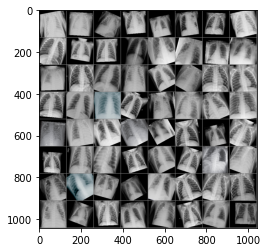

pneumonia_bac pneumonia_bac pneumonia_bac pneumonia_bac


In [156]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [157]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):

    def _name(self):
        return "CNN"

    def _conv2d(self, in_channels, out_channels):
        return nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3,
            padding=1
        )

    def _build_models(self):
        self.conv1 = nn.Sequential(
            self._conv2d(self.channels_size, self.hidden_size),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size),
            nn.MaxPool2d(2, 2)
        )
        self.conv2 = nn.Sequential(
            self._conv2d(self.hidden_size , self.hidden_size * 2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size * 2),
            nn.MaxPool2d(2, 2)
        )
        self.conv3 = nn.Sequential(
            self._conv2d(self.hidden_size*2, self.hidden_size * 4),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(self.hidden_size * 4),
            nn.MaxPool2d(2, 2)
        )
        self.dense = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.hidden_size * 4 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, 3),
        )
        return self.conv1, self.conv2, self.conv3, self.dense

    def __init__(self, hidden_size, channels_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.channels_size= channels_size
        self._models = self._build_models()
        self.name = self._name()

    def forward(self, image):
        x = self._models[0](image)
        x_1 = self._models[1](x)
        x_2 = self._models[2](x_1)
        x_3 = self._models[3](x_2)
        return x_3

In [158]:
hidden_size=32
channels_size=3

net=CNN(hidden_size, channels_size)

In [159]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [160]:
epochs=150

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

net.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Flatten()
    (1): Linear(in_features=32768, out_feat

In [161]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / 2000))
        #     running_loss = 0.0
        
    print('[%d] loss: %.3f' %
                  (epoch + 1, running_loss / i))
    running_loss = 0.0

print('Finished Training')
PATH = './stl10_net.pth'
torch.save(net.state_dict(), PATH)

[1] loss: 1.451
[2] loss: 1.304
[3] loss: 0.910
[4] loss: 0.943
[5] loss: 0.875
[6] loss: 0.500
[7] loss: 0.577
[8] loss: 0.906
[9] loss: 0.503
[10] loss: 0.681
[11] loss: 0.626
[12] loss: 0.541
[13] loss: 0.558
[14] loss: 0.807
[15] loss: 0.461
[16] loss: 0.597
[17] loss: 0.425
[18] loss: 0.365
[19] loss: 0.409
[20] loss: 0.535
[21] loss: 0.838
[22] loss: 0.376
[23] loss: 0.512
[24] loss: 0.317
[25] loss: 0.334
[26] loss: 0.474
[27] loss: 0.415
[28] loss: 0.331
[29] loss: 0.561
[30] loss: 0.353
[31] loss: 0.554
[32] loss: 0.370
[33] loss: 0.350
[34] loss: 0.399
[35] loss: 0.397
[36] loss: 0.385
[37] loss: 0.363
[38] loss: 0.289
[39] loss: 0.333
[40] loss: 0.298
[41] loss: 0.279
[42] loss: 0.313
[43] loss: 0.305
[44] loss: 0.252
[45] loss: 0.314
[46] loss: 0.270
[47] loss: 0.239
[48] loss: 0.330
[49] loss: 0.265
[50] loss: 0.326
[51] loss: 0.269
[52] loss: 0.295
[53] loss: 0.264
[54] loss: 0.200
[55] loss: 0.229
[56] loss: 0.313
[57] loss: 0.234
[58] loss: 0.238
[59] loss: 0.218
[60] l

In [162]:
# net.load_state_dict(torch.load(PATH))
# net.eval()

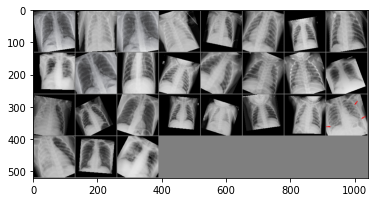

GroundTruth:  covid pneumonia_bac covid pneumonia_bac pneumonia_bac pneumonia_bac normal pneumonia_bac covid covid pneumonia_bac normal normal normal normal covid pneumonia_bac normal covid normal pneumonia_bac normal normal covid pneumonia_bac covid covid


In [210]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(27)))

In [211]:
outputs = net(images.to(device))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(27)))

Predicted:  covid pneumonia_bac covid pneumonia_bac pneumonia_bac normal normal pneumonia_bac covid covid pneumonia_bac normal pneumonia_bac normal normal covid pneumonia_bac pneumonia_bac covid pneumonia_bac pneumonia_bac pneumonia_bac pneumonia_bac covid pneumonia_bac covid covid


In [212]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), labels=None, target_names=classes, digits=3))

               precision    recall  f1-score   support

        covid      1.000     1.000     1.000         9
       normal      0.800     0.444     0.571         9
pneumonia_bac      0.615     0.889     0.727         9

     accuracy                          0.778        27
    macro avg      0.805     0.778     0.766        27
 weighted avg      0.805     0.778     0.766        27



[[9 0 0]
 [0 4 5]
 [0 1 8]]


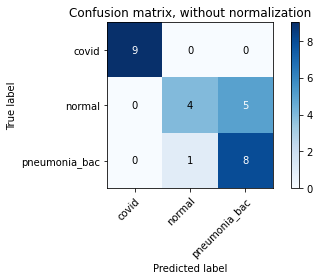

In [213]:
cm = confusion_matrix(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), labels=None, sample_weight=None)

print(cm)

plot_confusion_matrix(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy(), classes=np.asarray(classes), normalize=False)

Reference to estimated values

<img src="https://devopedia.org/images/article/208/6541.1566280388.jpg" alt="Drawing" width= '400px'/>


In [218]:
tot_acc=np.trace(cm)/np.sum(cm)

sensitivity = list(0. for i in range(cm.shape[0]))
specificity = list(0. for i in range(cm.shape[0]))

for i in range(cm.shape[0]):
  TP = cm[i,i]
  FN = np.sum(cm[i,:]) - cm[i,i]
  TN = (np.sum(cm)-np.sum(cm[i,:])-np.sum(cm[:,i]))
  FP = np.sum(cm[:,i]) - cm[i,i]
  sensitivity[i]= TP/ (TP + FN) 
  specificity[i]= TN /(TN + FP) 
  print("sensitivity for class ",classes[i],": ", sensitivity[i].round(3)) # probability of a positive test given that the patient has the disease
  print("specificity for class ",classes[i],": ", specificity[i].round(3))

print("total sensitivity: ", (np.sum(sensitivity)/len(classes)).round(3)) # needed?
print("total specificity: ", (np.sum(specificity)/len(classes)).round(3)) # needed?
print("tot_acc: ",tot_acc.round(3))


sensitivity for class  covid :  1.0
specificity for class  covid :  1.0
sensitivity for class  normal :  0.444
specificity for class  normal :  0.929
sensitivity for class  pneumonia_bac :  0.889
specificity for class  pneumonia_bac :  0.5
total sensitivity:  0.778
total specificity:  0.81
tot_acc:  0.778


In [167]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


In [185]:
class_correct = list(0. for i in range(3)) #classes
class_total = list(0. for i in range(3))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(27): #batch
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of covid : 100 %
Accuracy of normal : 77 %
Accuracy of pneumonia_bac : 88 %
